In [3]:
from model.modeling import data_modeling
from sklearn.model_selection import learning_curve
from cleaning import data_cleaning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay

* Load and Clean Dataset
* Define predictions and y_test to be used in visualization for predictive model accuracy


In [4]:
df_path = "./data/agriculture_dataset.csv"
clean_df, top_3_crops, encoded_df = data_cleaning(df_path)
model, predictions, X_train, X_test, y_train, y_test = data_modeling(clean_df)

Missing Values: 
Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64
Number of outliers detected: 0
Top 3 crops by yield: ['Tomato', 'Barley', 'Soybean']
R-Squared: 0.86
MAE: 3.90
RMSE: 4.71


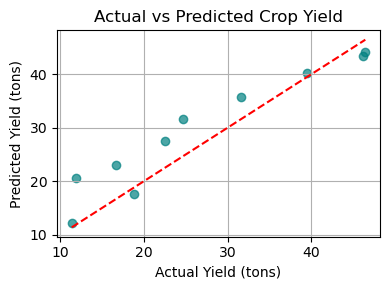

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(4,3))
plt.scatter(y_test, predictions, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Yield (tons)')
plt.ylabel('Predicted Yield (tons)')
plt.title('Actual vs Predicted Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig("./model/actual_vs_predicted.png", dpi=300);

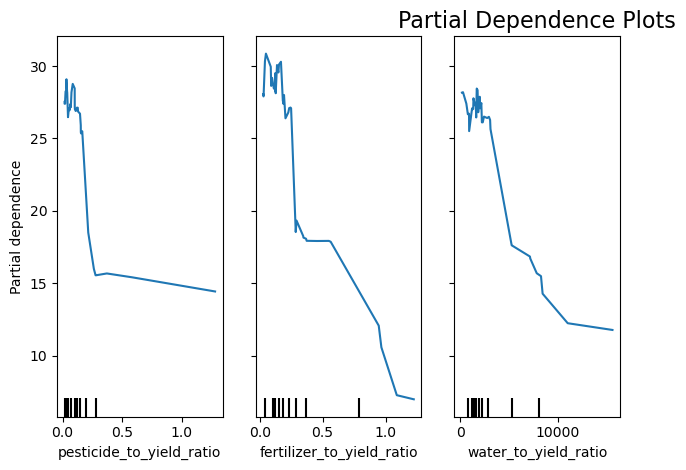

In [10]:
# Use column names as features
features = X_train.columns

# Use PartialDependenceDisplay to 
PartialDependenceDisplay.from_estimator(model, X_train, features=features, grid_resolution=50)

# Set the title for the plot
plt.title('Partial Dependence Plots', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


print(f"Error generating Partial Dependence Plot: {e}")